In [1]:
import numpy as np 
import pandas as pd

# Visualization
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns    

from sklearn.model_selection import train_test_split                     

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier   

import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.replace([np.inf, -np.inf], np.nan, inplace=True)
test.replace([np.inf, -np.inf], np.nan, inplace=True)
train.dropna(inplace=True)
test.dropna(inplace=True)
train.columns


Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

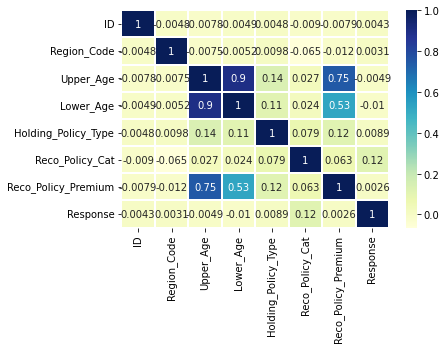

In [3]:
sns.heatmap(train.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="YlGnBu")
plt.show()

In [4]:
train.drop(['ID', 'City_Code', 'Region_Code'], axis=1, inplace=True)
test.drop(['ID', 'City_Code', 'Region_Code'], axis=1, inplace=True)

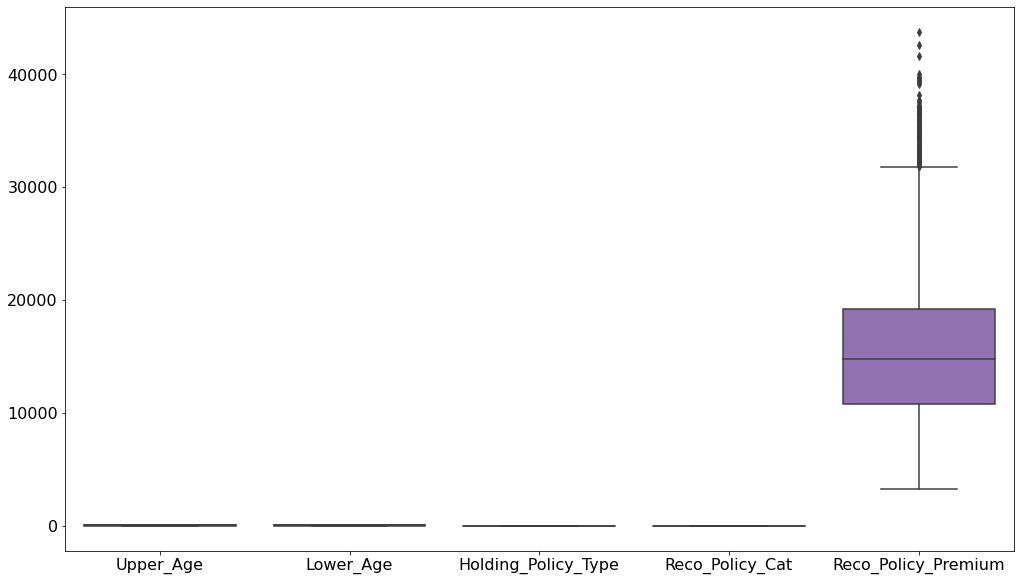

In [5]:
plt.figure(figsize=(17,10))
sns.boxplot(data=test)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<b> We can observe there are some outliers in the Policy Premium Category and these could also be a potential customers who might switch health insurance providers</b>

c:\users\shrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:0.7241164198074097')

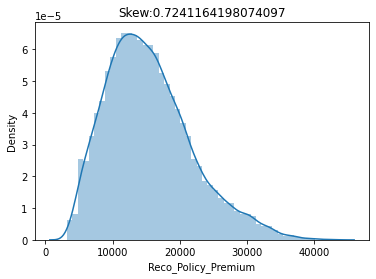

In [6]:
sns.distplot(train['Reco_Policy_Premium'])
Skew_Reco_Policy_Premium = train['Reco_Policy_Premium'].skew()
plt.title("Skew:"+str(Skew_Reco_Policy_Premium))

c:\users\shrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:0.6931648807282795')

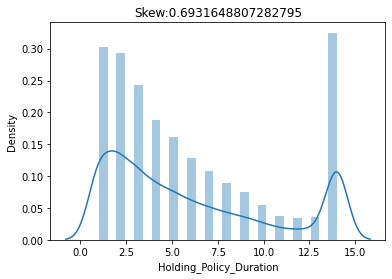

In [7]:
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].replace('14+', 14)
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].replace('14+', 14)
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].astype('float64')
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].astype('float64')


sns.distplot(train['Holding_Policy_Duration'])
Skew_Holding_Policy_Duration = train['Holding_Policy_Duration'].skew()
plt.title("Skew:"+str(Skew_Holding_Policy_Duration))

c:\users\shrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:-0.954476723242389')

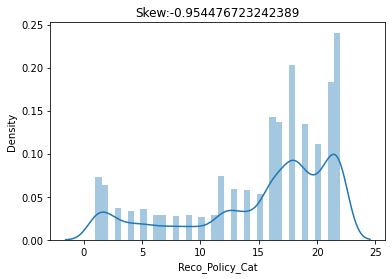

In [8]:
sns.distplot(train['Reco_Policy_Cat'])
Skew_Reco_Policy_Cat = train['Reco_Policy_Cat'].skew()
plt.title("Skew:"+str(Skew_Reco_Policy_Cat))

c:\users\shrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\shrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\shrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

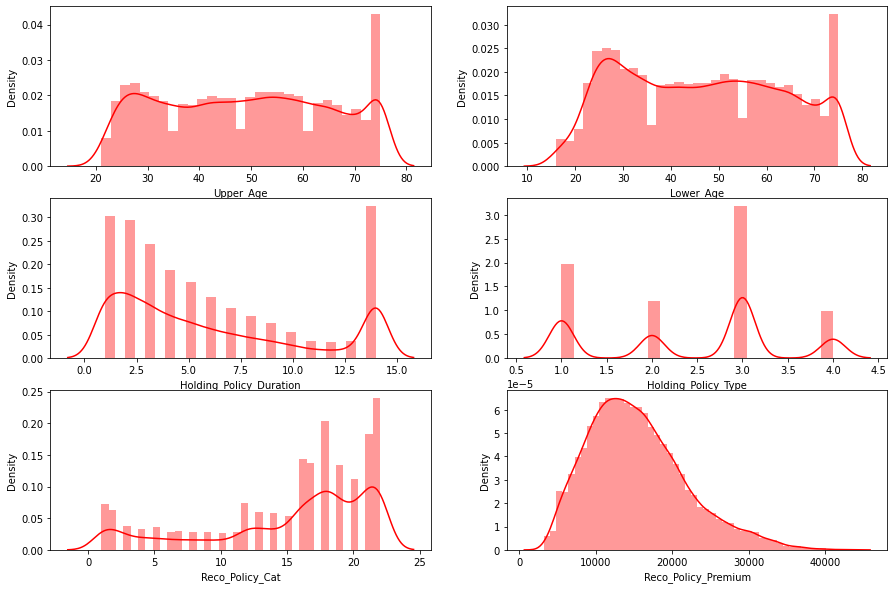

In [9]:
numeric_cols_train = train.select_dtypes(include=[np.number])
plt.figure(figsize = (15,10))
feature = numeric_cols_train.columns[0:6]
for i in enumerate(feature):
    plt.subplot(3,2, i[0]+1)
    sns.distplot(numeric_cols_train[i[1]], color='red')

In [10]:
# Transform discrete values to columns with 1 and 0s
train_discrete = pd.get_dummies(train)

test_discrete = pd.get_dummies(test)

In [11]:
X = train_discrete.drop('Response',axis=1)        # All rows & columns exclude Target features

y = train_discrete['Response']                  

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)

<b> Random Forest Classifier </b>

In [12]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train Score 0.76 & Test Score 0.75


<b> XG Boost </b>

In [13]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("Train Score {:.2f} & Test Score {:.2f}".format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))

Train Score 0.82 & Test Score 0.74
